1. Loading and preprocessing dataset
Original dataset shape: (545, 13)
Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

Missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
Dataset shape after removing missing values: (545, 13)

Dataset Statistics:
               area         price    bedrooms     stories
count    545.000000  5.450000e+02  545.000000  545.000000
mean    5150.541284  4.766729e+06    2.965138    1.805505
std     2170.141023  1.870440e+06    0.738064    0.867492
min     1650.000000  1.750000e+06    1.000000    1.000000
25%     3600.000000  3.430000e+06    2.000000    1.000000
50%     

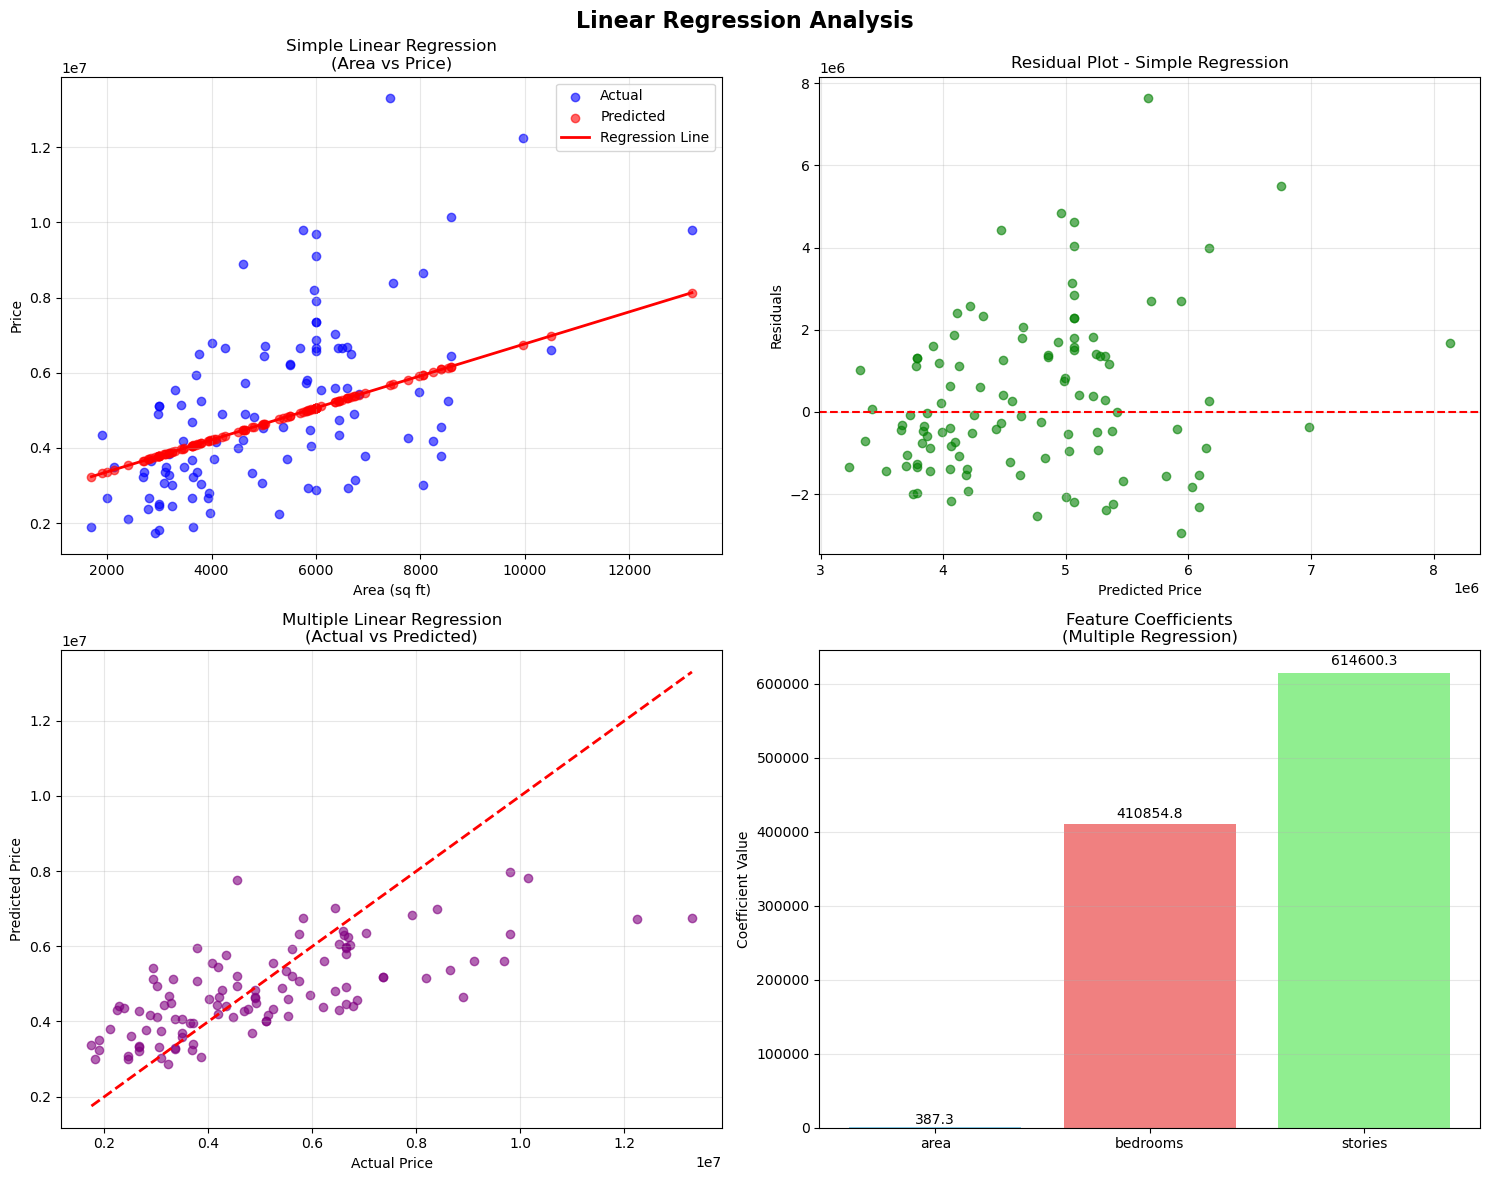


=== COEFFICIENT INTERPRETATION ===

Simple Linear Regression:
- For every 1 unit increase in area, price increases by $425.73
- Base price (when area = 0) is $2512254.26

Multiple Linear Regression:
- area: For every 1 unit increase, price changes by $387.31 (holding other features constant)
- bedrooms: For every 1 unit increase, price changes by $410854.82 (holding other features constant)
- stories: For every 1 unit increase, price changes by $614600.25 (holding other features constant)
- Base price (when all features = 0) is $399384.20

=== MODEL COMPARISON ===
Simple Linear Regression R²: 0.2729
Multiple Linear Regression R²: 0.4491
Improvement with multiple features: 0.1762
Multiple linear regression performs better than simple linear regression

Multiple regression explains 44.91% of the variance in house prices


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


print("1. Loading and preprocessing dataset")

df = pd.read_csv("Housing.csv")
print(f"Original dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

print(f"\nMissing values:\n{df.isnull().sum()}")

df_clean = df.dropna(subset=['area', 'price', 'bedrooms', 'stories'])
print(f"Dataset shape after removing missing values: {df_clean.shape}")

print(f"\nDataset Statistics:")
print(df_clean[['area', 'price', 'bedrooms', 'stories']].describe())


print("\n2. Splitting data into train-test sets")


X_simple = df_clean[['area']]
y = df_clean['price']

X_multi = df_clean[['area', 'bedrooms', 'stories']]

print(f"Features for simple regression: {X_simple.columns.tolist()}")
print(f"Features for multiple regression: {X_multi.columns.tolist()}")
print(f"Target variable: price")

X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train_multi.shape[0]}")
print(f"Test set size: {X_test_multi.shape[0]}")

print("\n3. Fitting Linear Regression models...")

print("\n--- Simple Linear Regression (Area vs Price) ---")
model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train_simple)
y_pred_simple = model_simple.predict(X_test_simple)

print(f"Model fitted successfully!")
print(f"Coefficient (slope): {model_simple.coef_[0]:.2f}")
print(f"Intercept: {model_simple.intercept_:.2f}")
print(f"Equation: Price = {model_simple.coef_[0]:.2f} * Area + {model_simple.intercept_:.2f}")

print("\n--- Multiple Linear Regression (Area, Bedrooms, Stories vs Price) ---")
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)
y_pred_multi = model_multi.predict(X_test_multi)

print(f"Model fitted successfully!")
print(f"Coefficients:")
for i, feature in enumerate(X_multi.columns):
    print(f"  {feature}: {model_multi.coef_[i]:.2f}")
print(f"Intercept: {model_multi.intercept_:.2f}")

equation = f"Price = {model_multi.intercept_:.2f}"
for i, feature in enumerate(X_multi.columns):
    equation += f" + {model_multi.coef_[i]:.2f} * {feature}"
print(f"Equation: {equation}")

print("\n4. Model Evaluation")

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name} Metrics:")
    print(f"  Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"  R² Score: {r2:.4f}")
    
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

simple_metrics = evaluate_model(y_test_simple, y_pred_simple, "Simple Linear Regression")
multi_metrics = evaluate_model(y_test_multi, y_pred_multi, "Multiple Linear Regression")

print("\n5. Visualization and Interpretation")


fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Linear Regression Analysis', fontsize=16, fontweight='bold')

axes[0, 0].scatter(X_test_simple['area'], y_test_simple, color='blue', alpha=0.6, label='Actual')
axes[0, 0].scatter(X_test_simple['area'], y_pred_simple, color='red', alpha=0.6, label='Predicted')

sorted_indices = np.argsort(X_test_simple['area'].values)
axes[0, 0].plot(X_test_simple['area'].values[sorted_indices], 
                y_pred_simple[sorted_indices], 
                color='red', linewidth=2, label='Regression Line')

axes[0, 0].set_title('Simple Linear Regression\n(Area vs Price)')
axes[0, 0].set_xlabel('Area (sq ft)')
axes[0, 0].set_ylabel('Price')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

residuals_simple = y_test_simple - y_pred_simple
axes[0, 1].scatter(y_pred_simple, residuals_simple, color='green', alpha=0.6)
axes[0, 1].axhline(y=0, color='red', linestyle='--')
axes[0, 1].set_title('Residual Plot - Simple Regression')
axes[0, 1].set_xlabel('Predicted Price')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].scatter(y_test_multi, y_pred_multi, color='purple', alpha=0.6)
axes[1, 0].plot([y_test_multi.min(), y_test_multi.max()], 
                [y_test_multi.min(), y_test_multi.max()], 
                'r--', linewidth=2)
axes[1, 0].set_title('Multiple Linear Regression\n(Actual vs Predicted)')
axes[1, 0].set_xlabel('Actual Price')
axes[1, 0].set_ylabel('Predicted Price')
axes[1, 0].grid(True, alpha=0.3)


features = X_multi.columns
coefficients = model_multi.coef_
colors = ['skyblue', 'lightcoral', 'lightgreen']
bars = axes[1, 1].bar(features, coefficients, color=colors)
axes[1, 1].set_title('Feature Coefficients\n(Multiple Regression)')
axes[1, 1].set_ylabel('Coefficient Value')
axes[1, 1].grid(True, alpha=0.3, axis='y')


for bar, coef in zip(bars, coefficients):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + (height * 0.01),
                    f'{coef:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n=== COEFFICIENT INTERPRETATION ===")
print("\nSimple Linear Regression:")
print(f"- For every 1 unit increase in area, price increases by ${model_simple.coef_[0]:.2f}")
print(f"- Base price (when area = 0) is ${model_simple.intercept_:.2f}")

print("\nMultiple Linear Regression:")
for i, feature in enumerate(X_multi.columns):
    print(f"- {feature}: For every 1 unit increase, price changes by ${model_multi.coef_[i]:.2f} (holding other features constant)")
print(f"- Base price (when all features = 0) is ${model_multi.intercept_:.2f}")


print("\n=== MODEL COMPARISON ===")
print(f"Simple Linear Regression R²: {simple_metrics['R2']:.4f}")
print(f"Multiple Linear Regression R²: {multi_metrics['R2']:.4f}")
print(f"Improvement with multiple features: {(multi_metrics['R2'] - simple_metrics['R2']):.4f}")

if multi_metrics['R2'] > simple_metrics['R2']:
    print("Multiple linear regression performs better than simple linear regression")
else:
    print("Simple linear regression performs as well or better than multiple regression")

print(f"\nMultiple regression explains {multi_metrics['R2']*100:.2f}% of the variance in house prices")
